In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

from scipy import stats

In [116]:
def find_number(text):
    num = re.findall(r'[0-9]+', text)
    return " ".join(num)

In [9]:
df_vc = pd.read_csv('res_prim_clean.csv')
df_vc

,link,name,gender,age,path1,path2,skills,languages,salary,experience,edu_degree,uni
0,https://hh.ru/resume/f6343d3e000364b04e0039ed1...,Аналитик,M,29,"Банки, инвестиции, лизинг",['Аналитик'],"['Креативность', 'Работа в команде', 'Грамотна...","['Русский — Родной', 'Английский — C1 — Продви...",0.0,Опыт работы 9 лет 3 месяца,Высшее образование,['Государственный университет по землеустройст...
1,https://hh.ru/resume/a460bf600008813d1e0039ed1...,Аналитик-переводчик,M,26,"Информационные технологии, интернет, телеком",['Аналитик'],"['Работоспособность', 'SWOT анализ', 'Перевод'...","['Русский — Родной', 'Английский — C2 — В сове...",70000.0,Опыт работы 1 год 3 месяца,Высшее образование (Бакалавр),['USEEFaculty of Legal and Business Studies Dr...
2,https://hh.ru/resume/1d5acdda0008d6a0580039ed1...,Аналитик,M,25,"Банки, инвестиции, лизинг",['Аналитик'],"['SQL', 'DWH', 'Бизнес-анализ', 'Системный ана...","['Русский — Родной', 'Английский — B1 — Средний']",0.0,Опыт работы 2 года 3 месяца,Высшее образование (Магистр),['Московский государственный технический униве...
3,https://hh.ru/resume/f068d4e200064239590039ed1...,Аналитик,M,26,"Информационные технологии, интернет, телеком","['Тестирование', 'Управление проектами', 'Анал...","['Аналитическое мышление', 'Работа в команде',...","['Русский — Родной', 'Английский — A1 — Началь...",180000.0,Опыт работы 2 года 4 месяца,Высшее образование (Бакалавр),['Тамбовский государственный технический униве...
4,https://hh.ru/resume/1ea9beb30009320c280039ed1...,Аналитик,M,0,0,0,"['Бумажный документооборот', 'Документооборот'...",0,0.0,Опыт работы 5 лет 5 месяцев,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15862,https://hh.ru/resume/350a2b26000321cd960039ed1...,"Аналитик, разработчик ETL (SAS DIS) и SQL",F,41,"Информационные технологии, интернет, телеком","['Банковское ПО', 'Программирование, Разработк...","['Oracle Pl/SQL', 'SQL', 'ORACLE', 'SAP Busine...","['Русский — Родной', 'Английский — C2 — В сове...",211000.0,Опыт работы 16 лет 7 месяцев,Высшее образование,['Национальный технический университет Украины...
15863,https://hh.ru/resume/7d96599500035fdade0039ed1...,Data Engineer,F,26,"Наука, образование","['Информатика, Информационные системы', 'Матем...","['Python', 'C/C++', 'Latex', 'Prism', 'MS Word...","['Русский — Родной', 'Английский — B2 — Средне...",0.0,Опыт работы 4 года 4 месяца,Высшее образование (Магистр),['Московский физико-технический институт (Госу...
15864,https://hh.ru/resume/c7b6d387000367598b0039ed1...,ETL DEVELOPER,M,31,"Информационные технологии, интернет, телеком","['Банковское ПО', 'Программирование, Разработка']",[],['Английский — Родной'],0.0,Опыт работы 10 лет 1 месяц,Высшее образование (Бакалавр),['SRI MANAKULA VINAYAKAR ENGINEERING COLLEGEEL...
15865,https://hh.ru/resume/03834a040004059e890039ed1...,Operation Geologist,F,45,Raw Materials,['Geological Exploration'],[],"['English — Native', 'Romanian — C2 — Proficie...",0.0,Work experience 19 years 9 months,Higher education (bachelor),"['INTEQMWD', 'Faculty of GeologyGeology']"


## Сколько соискателей указывают желаемую зп? 

Text(0.5, 0, 'Количество соискателей')

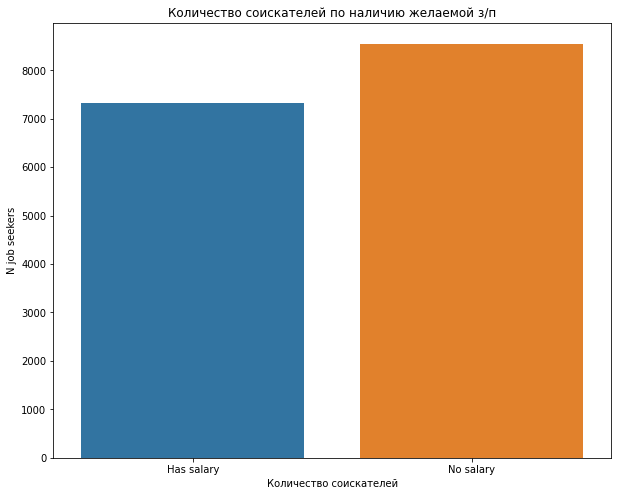

In [18]:
df_vc['has_salary'] = np.where(df_vc['salary']>0, 'Has salary','No salary')

report = df_vc[['has_salary', 'salary']].groupby('has_salary').agg('count')
report.columns = ['N job seekers']
report =report.reset_index()

plt.figure(figsize=(10,8))
ax= sns.barplot(y='N job seekers', x='has_salary',
                data=report)
ax.set_title('Количество соискателей по наличию желаемой з/п')
ax.set_xlabel('Количество соискателей')


Большинство соискателей не указывают желаемую з/п. Возможно, они выигрывают от этого, так как работодатель первым называет з/п и кандидат может претендовать на большее вознаграждение. 

## Как распределена зп?

Text(0.5, 0, 'З/п в в руб.')

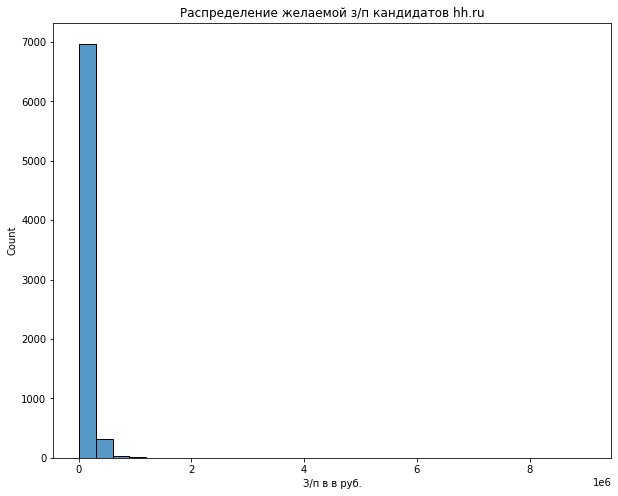

In [24]:
plt.figure(figsize=(10,8))
ax = sns.histplot(df_vc[df_vc['salary']>0]['salary'], bins=30)
ax.set_title('Распределение желаемой з/п кандидатов hh.ru')
ax.set_xlabel('З/п в в руб.')


Наблюдаем, что в данных присуствует аномалии с большим желаемым з/п, которые намного больше среднего значения - несколько миллионов рублей😱. 

Попробуем почистить данные

In [32]:
perc99 = np.quantile(df_vc[df_vc['salary']>0]['salary'], 0.99)

Text(0.5, 0, 'З/п в в руб.')

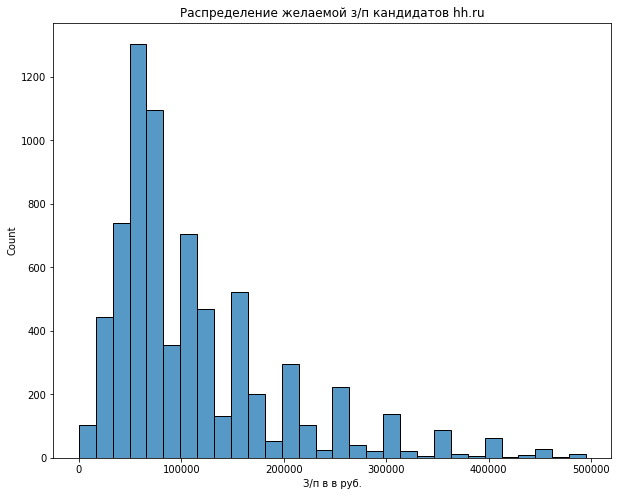

In [33]:
plt.figure(figsize=(10,8))
ax = sns.histplot(df_vc[(df_vc['salary']>0)
                       &(df_vc['salary']<perc99)]['salary'], bins=30)
ax.set_title('Распределение желаемой з/п кандидатов hh.ru')
ax.set_xlabel('З/п в в руб.')


Будем считать аномальными кандидатов, которые желают более 500к рублей. 

Text(0.5, 0, 'З/п в в руб.')

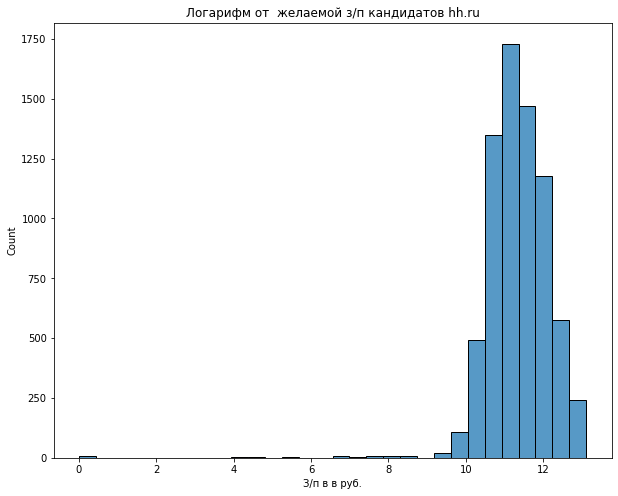

In [34]:
plt.figure(figsize=(10,8))
ax = sns.histplot(np.log(df_vc[(df_vc['salary']>0)
                       &(df_vc['salary']<perc99)]['salary']), bins=30)
ax.set_title('Логарифм от  желаемой з/п кандидатов hh.ru')
ax.set_xlabel('З/п в в руб.')


Наблюдаем смещеное распределение, уберем кандидатов, которые просят слишком мало. 

Text(0.5, 0, 'З/п в в руб.')

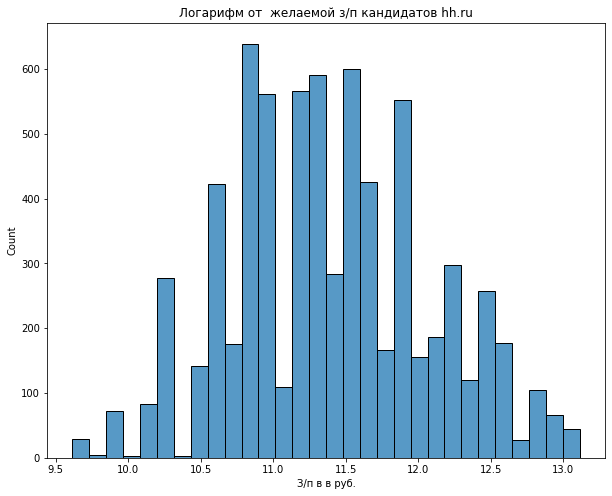

In [38]:
plt.figure(figsize=(10,8))
ax = sns.histplot(np.log(df_vc[(df_vc['salary']>10000)
                       &(df_vc['salary']<perc99)]['salary']), bins=30)
ax.set_title('Логарифм от  желаемой з/п кандидатов hh.ru')
ax.set_xlabel('З/п в в руб.')


В дальнешейм будем рассматривать только кандидатов с желаемой зп от 10 до 500к или тех, кто не указал свою зп.

После сглаживания логарифмом наблюдаем распределение немного похожее на нормальное. Проверим нормальное ли оно?

In [41]:
k2, p = stats.normaltest(np.log(df_vc[(df_vc['salary']>10000)
                       &(df_vc['salary']<perc99)]['salary']))
p

1.0373823341287943e-27

Р-value меньше 0.05, следовательно, нельзя принять нулевую гипотезу о нормальности распределения логарифмированной выборки зарплат.

In [44]:
df_clean = df_vc[(df_vc['salary']>10000)
                       &(df_vc['salary']<perc99)]

In [52]:
df_clean = df_clean[df_clean['experience']!='Ключевые навыки']

In [ ]:
def find_min_salary(text):
    text = text.replace(u'\xa0', '')
    num = re.findall("от [0-9]*", text)
    try:
        return num[0].replace('от ', '')
    except:
        return '

In [ ]:
df['salary'].apply(lambda x: find_min_salary(x))

In [157]:
df_clean = get_experience(df_clean)

<ipython-input-156-7b4feff00620>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'] = df['experience'].str.replace("\xa0" , ' ')
<ipython-input-156-7b4feff00620>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'] = df['experience'].str.replace('Опыт работы ', '')
<ipython-input-156-7b4feff00620>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [145]:
df_clean2 = df_clean.copy()
df_clean2 = get_experience(df_clean2)
df_clean2['experience'].value_counts()

1 лет 4 месяцев      61
5 лет 2 месяцев      53
4 месяцев            52
1 лет 1 месяцев      50
3 лет 4 месяцев      50
                     ..
23 лет 1 месяцев      1
42 лет 8 месяцев      1
30 лет 8 месяцев      1
36 лет 5 месяцев      1
34 лет 10 месяцев     1
Name: experience, Length: 459, dtype: int64

In [146]:
df_clean2['exper_groups'].value_counts()

10+    2995
6-9    1426
2-3    1001
4-5     865
1       537
0        55
Name: exper_groups, dtype: int64

In [88]:
df_clean2['experience'] = df_clean2['experience'].str.replace(' ', ' ')
df_clean2['experience'].str.split('лет')

1          [1 ,  3 месяцев]
3          [2 ,  4 месяцев]
5         [1 ,  11 месяцев]
7          [2 ,  6 месяцев]
9         [3 ,  10 месяцев]
                ...        
15852     [11 ,  2 месяцев]
15856      [2 ,  8 месяцев]
15861    [11 ,  11 месяцев]
15862     [16 ,  7 месяцев]
15866               [21 , ]
Name: experience, Length: 6879, dtype: object

In [99]:
df_clean2[~df_clean2['experience'].str.contains('мес')]['experience'].str.split('лет')

33        [3 , ]
61       [20 , ]
62        [3 , ]
63        [4 , ]
70       [28 , ]
          ...   
15713     [5 , ]
15733     [2 , ]
15736    [19 , ]
15840     [6 , ]
15866    [21 , ]
Name: experience, Length: 732, dtype: object

In [110]:
df_clean2['experience'].str.split('лет')

1          [1 ,  3 месяцев]
3          [2 ,  4 месяцев]
5         [1 ,  11 месяцев]
7          [2 ,  6 месяцев]
9         [3 ,  10 месяцев]
                ...        
15852     [11 ,  2 месяцев]
15856      [2 ,  8 месяцев]
15861    [11 ,  11 месяцев]
15862     [16 ,  7 месяцев]
15866               [21 , ]
Name: experience, Length: 6879, dtype: object

In [128]:
df_clean2['exper_years'] = df_clean2['experience'].str.split('лет').str[0]
df_clean2['exper_months'] = df_clean2['experience'].str.split('лет').str[1]

In [129]:
df_clean2['exper_months']

1          3 месяцев
3          4 месяцев
5         11 месяцев
7          6 месяцев
9         10 месяцев
            ...     
15852      2 месяцев
15856      8 месяцев
15861     11 месяцев
15862      7 месяцев
15866               
Name: exper_months, Length: 6879, dtype: object

In [121]:
df_clean2['exper_months']

' 3\xa0месяцев'

In [131]:
df_clean2['exper_months'].apply(str).apply(lambda x: find_number(x))


1         3
3         4
5        11
7         6
9        10
         ..
15852     2
15856     8
15861    11
15862     7
15866      
Name: exper_months, Length: 6879, dtype: object

In [156]:
def get_experience(df):
    df['experience'] = df['experience'].str.replace("\xa0" , ' ')
    df['experience'] = df['experience'].str.replace('Опыт работы ', '')
    df['experience'] = df['experience'].str.replace('Work experience ', '')
    df['experience'] = df['experience'].str.replace('years', 'лет')
    df['experience'] = df['experience'].str.replace('year', 'лет')
    df['experience'] = df['experience'].str.replace('года', 'лет')
    df['experience'] = df['experience'].str.replace('год', 'лет')
    
    df['experience'] = df['experience'].str.replace('months', 'месяцев')
    df['experience'] = df['experience'].str.replace('month', 'месяцев')
    df['experience'] = df['experience'].str.replace('месяца', 'месяцев')
    df['experience'] = df['experience'].str.replace('месяц', 'месяцев')
    df['experience'] = df['experience'].str.replace('месяцевев', 'месяцев')
    
    
    df['exper_years'] = np.where(df['experience'].str.contains('лет'),
                                 df['experience'].str.split('лет').str[0],
                                 '')
    df['exper_months'] = np.where(df['experience'].str.contains('лет'),
                                df['experience'].str.split('лет').str[1],
                                  df['experience'])
    
    df['exper_years'] = df['exper_years'].apply(str).apply(lambda x: find_number(x))
    df['exper_months'] = df['exper_months'].apply(str).apply(lambda x: find_number(x))
    
    for col in ['exper_years', 'exper_months']:
        df[col] = df[col].apply(str).apply(lambda x: find_number(x))
        df[col] = np.where(df[col]=='', 0, df[col])
        df[col] = df[col].astype(int)
    df['total_months'] = df['exper_years']*12 + df['exper_months']
    
    conds = [
        df['exper_years']==0,
        df['exper_years']==1,
        df['exper_years']<4,
        df['exper_years']<6,
        df['exper_years']<10,
        df['exper_years']>=10,
    ]
    choices = ['до 1', 'от 1 до 2 лет', 'от 2 до 4 лет', 'от 4 до 5 лет','от 6 до 10 лет','10 лет и более' ]
    df['exper_groups'] = np.select(conds,choices)
    
    
    return df

In [159]:
df_clean[~df_clean['experience'].str.contains('лет')]

,link,name,gender,age,path1,path2,skills,languages,salary,experience,edu_degree,uni,has_salary,exper_years,exper_months,total_months,exper_groups,experience_ye
41,https://hh.ru/resume/ca517e8d0008a40f7e0039ed1...,Аналитик,M,23,"Информационные технологии, интернет, телеком","['Тестирование', 'CRM системы', 'Аналитик']","['Целеустремленность', 'Коммуникабельность', '...","['Русский — Родной', 'Английский — B1 — Средний']",140000.0,10 месяцев,Среднее специальное образование,['Российский государственный аграрный универси...,Has salary,0,10,10,до 1,10 месяцев
103,https://hh.ru/resume/bbe81fff00059ec8b90039ed1...,Аналитик,M,23,"Начало карьеры, студенты","['Информационные технологии, Интернет, Мультим...","['MS Office', 'Visual Basic', '1С: Предприятие...","['Русский — Родной', 'Английский — C2 — В сове...",80000.0,11 месяцев,Высшее образование,"['Национальный исследовательский университет ""...",Has salary,0,11,11,до 1,11 месяцев
158,https://hh.ru/resume/8b2d7d4700092277b60039ed1...,Product Analyst,M,24,"Информационные технологии, интернет, телеком","['Игровое ПО', 'Управление проектами', 'Аналит...","['Работа в команде', 'Управление проектами', '...","['Русский — Родной', 'Английский — C1 — Продви...",80000.0,11 месяцев,Высшее образование (Бакалавр),"['Сибирский федеральный университет, Красноярс...",Has salary,0,11,11,до 1,11 месяцев
271,https://hh.ru/resume/927328160007e639420039ed1...,Аналитик,M,21,"Информационные технологии, интернет, телеком","['Программирование, Разработка', 'Управление п...","['C++, Python, SQL, C, Bash', 'Django, Postgre...","['Русский — Родной', 'Английский — B1 — Средний']",150000.0,8 месяцев,Неоконченное высшее образование,['Московский физико-технический институт (Госу...,Has salary,0,8,8,до 1,8 месяцев
287,https://hh.ru/resume/f1336faf0006d8788b0039ed1...,Аналитик,M,26,Консультирование,"['Исследования рынка', 'Начальный уровень, Мал...","['Уверенный пользователь MS Office', 'Стрессоу...","['Русский — Родной', 'Английский — C1 — Продви...",50000.0,10 месяцев,Высшее образование (Магистр),['Московский государственный университет им. М...,Has salary,0,10,10,до 1,10 месяцев
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15618,https://hh.ru/resume/e915c3330002a6aafd0039ed1...,Аналитик данных/ Data analyst,F,27,"Банки, инвестиции, лизинг",['Аналитик'],"['Маркетинговый анализ', 'Анализ данных', 'Про...","['Русский — Родной', 'Английский — C2 — В сове...",80000.0,3 месяцев,Высшее образование,"['Национальный исследовательский университет ""...",Has salary,0,3,3,до 1,3 месяцев
15670,https://hh.ru/resume/cd1e7d8c0008fdeb170039ed1...,"Аналитик данных / Data Analyst, потребительски...",M,24,"Банки, инвестиции, лизинг",['Аналитик'],"['Работоспособность', 'Python', 'SQL']","['Русский — Родной', 'Английский — B2 — Средне...",100000.0,2 месяцев,Высшее образование,['Московский физико-технический институт (Госу...,Has salary,0,2,2,до 1,2 месяцев
15751,https://hh.ru/resume/3c5eafdb00034bf86e0039ed1...,Marketing | PR | Ecommerce | Data Analyst,M,26,"Маркетинг, реклама, PR","['Дизайнер', 'PR, Маркетинговые коммуникации',...","['Data Analysis', 'MS PowerPoint', 'Data Minin...","['Русский — Родной', 'Английский — C2 — В сове...",50000.0,9 месяцев,Высшее образование,['Modul University ViennaBachelor of Business ...,Has salary,0,9,9,до 1,9 месяцев
15803,https://hh.ru/resume/f655b4a90007fb24d80039ed1...,Python разработчик,M,30,"Начало карьеры, студенты","['Информационные технологии, Интернет, Мультим...","['Python', 'Django Framework', 'Docker', 'dock...","['Русский — Родной', 'Английский — A2 — Элемен...",50000.0,4 месяцев,Высшее образование (Магистр),['Национальный исследовательский ядерный униве...,Has salary,0,4,4,до 1,4 месяцев


## Как опыт влияет на з/п? с точки зрения кандидата

Text(0.5, 0, 'Опыт.')

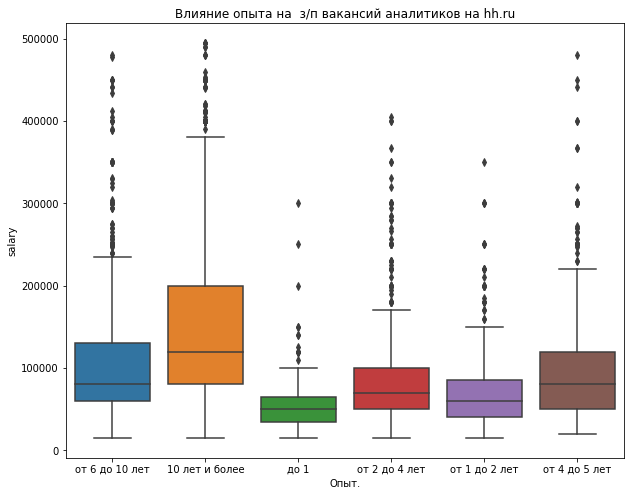

In [161]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='salary', x='exper_groups', data=df_clean.sort_values('salary'))
ax.set_title('Влияние опыта на  з/п вакансий аналитиков на hh.ru')
ax.set_xlabel('Опыт.')


Наблюдаем ожидаемое повышение желаемого вознаграждения вместе с ростом количества лет опыта. 

## Сколько много опытных кандидатов ищут работу? 

Text(0.5, 0, 'Количество соискателей')

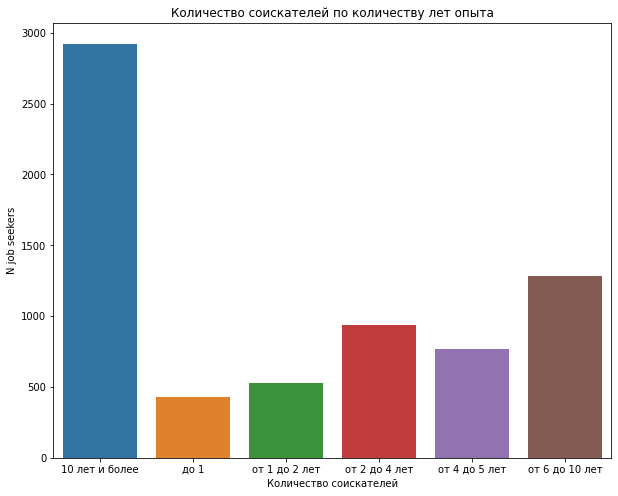

In [160]:
report = df_clean[['exper_groups', 'salary']].groupby('exper_groups').agg('count')
report.columns = ['N job seekers']
report =report.reset_index()

plt.figure(figsize=(10,8))
ax= sns.barplot(y='N job seekers', x='exper_groups',
                data=report)
ax.set_title('Количество соискателей по количеству лет опыта')
ax.set_xlabel('Количество соискателей')

Наблюдаем, что большинство кандидатов имеют опыт более 10 лет. Но к сожалению, пока не знаем, какой % опыта релевантен тем вакансиям, на которые подается кандидат. 

## Распределение соискателей по полу

Text(0.5, 0, 'Количество соискателей')

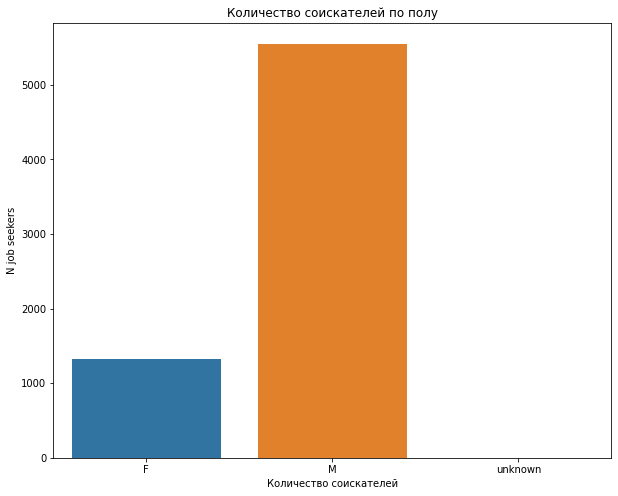

In [167]:
report = df_clean[['gender', 'salary']].groupby('gender').agg('count')
report.columns = ['N job seekers']
report =report.reset_index()

plt.figure(figsize=(10,8))
ax= sns.barplot(y='N job seekers', x='gender',
                data=report)
ax.set_title('Количество соискателей по полу')
ax.set_xlabel('Количество соискателей')

Наблюдаем, что текущий IT-рынок среди соискателей в России характеризуется тем, что количество мужчин в несколько раз больше чем женщин

## Как пол влияет на ожидаемую з/п ? 

Text(0.5, 0, 'Пол')

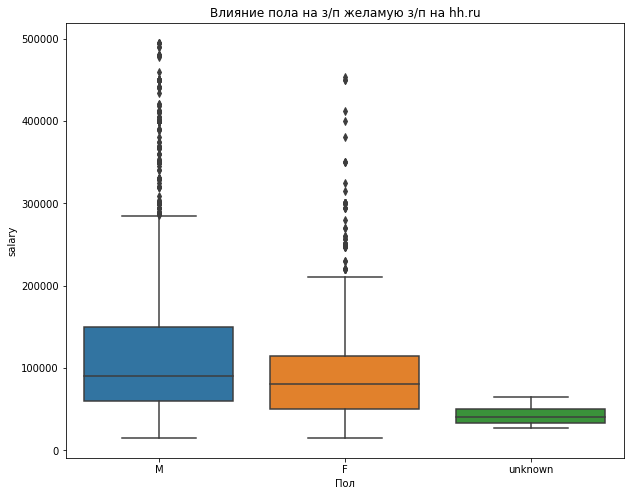

In [169]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='salary', x='gender', data=df_clean.sort_values('salary'))
ax.set_title('Влияние пола на з/п желамую з/п на hh.ru')
ax.set_xlabel('Пол')


Заметим, что медиана желамой з/п немного больше среди мужчин. Более того, мужская Q3 квантиль превышает уже значительно женскую. 

## Распределение соискателей по уровню образования

In [173]:
report = df_clean[['edu_degree', 'salary']].groupby('edu_degree').agg('count')
report.columns = ['N job seekers']
report =report.reset_index()
report

,edu_degree,N job seekers
0,Education,1
1,Higher education,258
2,Higher education (Candidate of Science),28
3,Higher education (Doctor of Science),12
4,Higher education (bachelor),70
5,Higher education (master),77
6,Incomplete higher education,28
7,Secondary education,1
8,Secondary special education,9
9,Высшее образование,3637


Так как большинство соискателей не указывают уровень высшего образования, сгруппируем бакалавров и магистров. 

In [179]:
def get_education_degree(df):
    df['edu_degree_clean'] = np.where(df['edu_degree'].isin(['Высшее образование (Доктор наук)',
                                                      'Высшее образование (Кандидат наук)',
                                                      'Higher education (Doctor of Science)',
                                                      'Higher education (Candidate of Science)']),
                                'Phd',
                                df['edu_degree']
                                                   )
    df['edu_degree_clean'] = np.where(df['edu_degree_clean'].isin(['Higher education (bachelor)',
                                                      'Higher education',
                                                       'Higher education (master)',
                                                      'Высшее образование',
                                                      'Высшее образование (Бакалавр)',
                                                      'Высшее образование (Магистр)']),
                                      'Higher Education',
                                      df['edu_degree_clean'])
                                      
    df['edu_degree_clean'] = np.where(df['edu_degree_clean'].isin(['Secondary education',
                                                      'Education',
                                                       'Secondary special education',
                                                      'Образование',
                                                      'Среднее специальное образование',
                                                      'Среднее образование']),
                                      'Secondary Education',
                                      df['edu_degree_clean']
                                                     )
    df['edu_degree_clean'] = np.where(df['edu_degree_clean'].isin(['Incomplete higher education',
                                                      'Неоконченное высшее образование']),
                                      'Incomplete higher education',
                                      df['edu_degree_clean']
                                                     )
    
    return df

In [180]:
df_clean = get_education_degree(df_clean)

<ipython-input-179-d162456e49ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edu_degree_clean'] = np.where(df['edu_degree'].isin(['Высшее образование (Доктор наук)',
<ipython-input-179-d162456e49ea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edu_degree_clean'] = np.where(df['edu_degree_clean'].isin(['Higher education (bachelor)',
<ipython-input-179-d162456e49ea>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Text(0.5, 0, 'Уроовень образования')

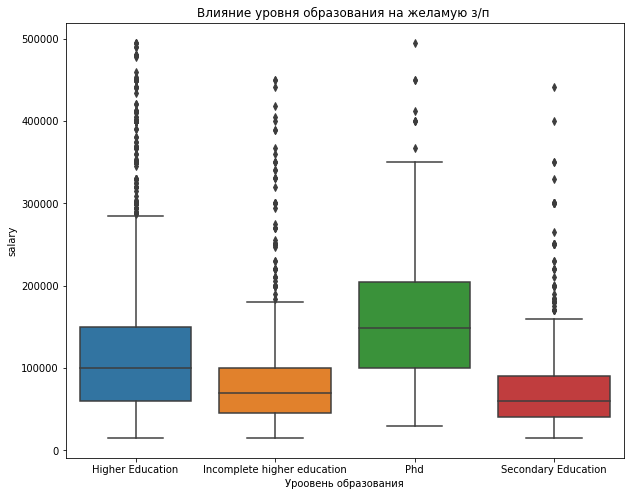

In [181]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='salary', x='edu_degree_clean', data=df_clean.sort_values('edu_degree_clean'))
ax.set_title('Влияние уровня образования на желамую з/п ')
ax.set_xlabel('Уроовень образования')


Наблюдаем наибольшую желаемую з/п среди кандидатов, которые имеют ученую степень. Можно сказать, что есть положительная корреляция между уровнем образования и желаемым доходом

In [192]:
df_clean['name'].value_counts()[60:100]

Программист С++                              10
HTML-верстальщик                             10
Инженер-программист АСУ ТП                   10
Специалист технической поддержки             10
Android developer                            10
аналитик                                     10
Технический директор                          9
Младший финансовый аналитик                   9
Frontend разработчик                          9
Помощник руководителя                         9
Python developer                              9
программист                                   9
Инженер-разработчик                           9
Программист Delphi                            9
Junior Frontend-разработчик                   9
Разработчик                                   9
Техник-программист                            9
Программист Java                              9
IT директор                                   9
Трейдер-аналитик                              9
Руководитель IT отдела                  

In [185]:
unique_skils = get_unique_skills(df)

In [184]:
def get_unique_skills(df)->set:
    """
    Extracts skils from df
    """
    unique_skils = set()
    for index, row in df.iterrows():

        skills_str = row['skills'].replace('[', '')
        skills_str = skills_str.replace(']', '')
        skills_str = skills_str.replace("'", '')
        list_skils = skills_str.split(', ')

        unique_skils.update(list_skils)
        
    return unique_skils


def create_skills_columns(df, unique_skils)->df:
    """
    Add indicator columns 
    """
    for skill in unique_skils:
        try:
            df[skill] = np.where(df['skills'].str.contains(skill), 1,0)
        except Exception as e:
            print(e)
            print(f'Cant create column {skill}')
        
    return df

In [186]:
df = create_skills_columns(df, unique_skils)

<ipython-input-184-785a505aa41d>:24: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[skill] = np.where(df['skills'].str.contains(skill), 1,0)
<ipython-input-184-785a505aa41d>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[skill] = np.where(df['skills'].str.contains(skill), 1,0)


missing ), unterminated subpattern at position 3
Cant create column AAA(Tacacs+
multiple repeat at position 2
Cant create column С++
missing ), unterminated subpattern at position 4
Cant create column CMS (Python Django
multiple repeat at position 4
Cant create column C/C++
missing ), unterminated subpattern at position 26
Cant create column Уверенный пользователь ПК (Word
missing ), unterminated subpattern at position 43
Cant create column Хорошее знание IT – рынка и IT – продуктов (серверы
missing ), unterminated subpattern at position 24
Cant create column Знание основ баз данных (Oracle SQL
unbalanced parenthesis at position 6
Cant create column Radius)
unbalanced parenthesis at position 6
Cant create column Drupal)
multiple repeat at position 2
Cant create column C++
unbalanced parenthesis at position 5
Cant create column Excel)
unbalanced parenthesis at position 20
Cant create column сетевое оборудование)


In [187]:
df

,link,names,skills,salary,experience,name,,MEAN,SIEM,Помощник руководителя,...,Корректура текстов,Анализ организационной структуры компании,Консультирование клиентов,SOLID,Ansible,Организация стажировок,Human Resources Management,Продажи юридическим лицам,Разработка и внедрение системы KPI,Python
0,https://hh.ru/vacancy/50077086?from=vacancy_se...,0,"['Agile Project Management', 'Работа в команде...",от 250 000 руб. до вычета налогов,3–6 лет,Руководитель IT-проектов,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://hh.ru/vacancy/50024086?from=vacancy_se...,0,"['Администрирование сетевого оборудования', 'L...",от 90 000 до 120 000 руб. на руки,3–6 лет,Системный администратор в компанию разработки ПО,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,https://hh.ru/vacancy/49519390?from=vacancy_se...,0,"['Сборка ПК', 'Настройка ПК', 'Информационная ...",от 100 000 до 100 000 руб. на руки,3–6 лет,Специалист по IT,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,https://hh.ru/vacancy/49916939?from=vacancy_se...,0,['Знание компьютера'],от 45 000 руб. на руки,не требуется,Специалист по IT,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,https://hh.ru/vacancy/50084251?from=vacancy_se...,0,"['Мобильность', 'Многозадачность', 'SaaS', 'Уд...",от 130 000 до 180 000 руб. на руки,1–3 года,Middle System Administrator,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,https://hh.ru/vacancy/50187180?from=vacancy_se...,0,"['Работа с ТМЦ', 'Работа с поставщиками', 'Отв...",от 63 218 до 63 218 руб. до вычета налогов,1–3 года,Специалист по учету ТМЦ,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1946,https://hh.ru/vacancy/50106182?from=vacancy_se...,0,"['Складская логистика', 'Складской Учет', 'Инв...",от 60 000 руб. на руки,1–3 года,Кладовщик,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1947,https://hh.ru/vacancy/45939762?from=vacancy_se...,0,[],от 75 000 до 80 000 руб. на руки,более 6 лет,Главный бухгалтер,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1948,https://hh.ru/vacancy/50172334?from=vacancy_se...,0,"['Английский\xa0— C1 — Продвинутый', 'Project ...",от 300 000 до 400 000 руб. на руки,3–6 лет,Project Manager,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
